In [ ]:
import pandas as pd
import numpy as np
import re   #regular expression support,build in

In [ ]:
AMAZON_DATA_PATH= '/content/Reviews.csv'

In [ ]:
class Load_amazon_data:

    def __init__(self, dir_path, seed= 0):

        #Initialization

        self.dir_path= dir_path
        np.random.seed(seed)

    def load(self):

        #Reads data from the given directory path

        return pd.read_csv(self.dir_path)

    def drop(self):

        #Drops unnecessary columns

        data= self.load()

        data = data.dropna()
        data= data.iloc[:, -2:]
        data = data.reset_index(drop= True)

        return data

    def analyze_data(self):

        #Prints some sample data points from the cleaned data

        data= self.drop()

        for sr_no, i in enumerate(np.random.randint(10, 100, size= 5)):
            print("_________________________")
            print("Data Point {0}".format(sr_no + 1))
            print("Summary:")
            print(data['Summary'].iloc[i])
            print("Full Text:")
            print(data['Text'].iloc[i])

In [ ]:
obj= Load_amazon_data(AMAZON_DATA_PATH, seed= 1)

In [ ]:
data= obj.load()
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Droping unnessesary columns
data= obj.drop()
data.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.shape

(299267, 2)

In [ ]:
obj.analyze_data()    #Data analyze

_________________________
Data Point 1
Summary:
Mushy
Full Text:
The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.
_________________________
Data Point 2
Summary:
Delicious product!
Full Text:
I can remember buying this candy as a kid and the quality hasn't dropped in all these years. Still a superb product you won't be disappointed with.
_________________________
Data Point 3
Summary:
Forget Molecular Gastronomy - this stuff rockes a coffee creamer!
Full Text:
I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other h

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
class Data_cleaning:
    def __init__(self):
        self.clean_summaries= []
        self.clean_texts= []

    def clean_text(self, text, remove_stopwords = False):

        #Defines a series of cleaning operations

        text = text.lower()

        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)

        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text)
        text = re.sub(r'[_"\-;%()|+&=*%.!,?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'<br >', ' ', text)
        text = re.sub(r'<br  >', ' ', text)
        text = re.sub(r'\'', ' ', text)

        # Optionally, remove stop words(unimportant words)
        if remove_stopwords:
            text = text.split()
            stops = set(stopwords.words("english"))
            text = [w for w in text if not w in stops]
            text = " ".join(text)

        return text

    def clean(self, data):

        #Applies the clean_text() to the entire dataset
        for summary in data.Summary:
            self.clean_summaries.append(self.clean_text(summary))

        print("Summaries are complete.")

        for text in data.Text:
            self.clean_texts.append(self.clean_text(text))

        print("Texts are complete.")

        return self.clean_summaries, self.clean_texts

In [ ]:

clean_obj= Data_cleaning()
clean_summaries, clean_texts= clean_obj.clean(data)

Summaries are complete.
Texts are complete.


In [ ]:
np.random.seed(1)   #Display random points

for sr_no, i in enumerate(np.random.randint(10, 100, size= 5)):
    print("_________________________")
    print("Data Point #{0}".format(sr_no + 1))
    print("Summary:")
    print(clean_summaries[i])
    print("Full Text:")
    print(clean_texts[i])

_________________________
Data Point #1
Summary:
mushy
Full Text:
the flavors are good  however  i do not see any differce between this and oaker oats brand   they are both mushy 
_________________________
Data Point #2
Summary:
delicious product 
Full Text:
i can remember buying this candy as a kid and the quality has not dropped in all these years  still a superb product you will not be disappointed with 
_________________________
Data Point #3
Summary:
forget molecular gastronomy   this stuff rockes a coffee creamer 
Full Text:
i know the product title says molecular gastronomy  but do not let that scare you off  i have been looking for this for a while now  not for food science  but for something more down to earth  i use it to make my own coffee creamer   i have to have my coffee blonde and sweet   but the flavored creamers are full of the bad kinds of fat  and honestly  i hate to use manufactured  food  items  i really do not think they are good for the body  on the other hand  i

In [ ]:
amazon_data= list()   #append new data
for (summ, story) in zip(clean_summaries, clean_texts):
    amazon_data.append({'story': [story], 'highlights':[summ]})

In [ ]:
for sr_no, i in enumerate(np.random.randint(10, 10000, size= 5)):
    print("_________________________")
    print("Data Point #{0}".format(sr_no + 1))
    print("Summary:")
    print(amazon_data[i]['highlights'])
    print("Full Text:")
    print(amazon_data[i]['story'])

_________________________
Data Point #1
Summary:
['celebration s hibiscus tea']
Full Text:
['in an effort to reverse augmenting high blood pressure  a physician recommended i drink hibiscus herbal tea  kudos to celebration herbals for delivering the tea one day after the order was placed  i followed instructions on the box and used spring water which was steeped for approximately ten minutes  although the primary reason for drinking the tea was medicinal  i also wanted a flavorable tea  sadly the taste of the tea was unexceptional  accordingly  the next box of hibiscus tea that i purchase will not be from celebration herbals ']
_________________________
Data Point #2
Summary:
['yummy']
Full Text:
['when you have a craving for a sweet but you do not will not too much  this bar is just perfect  it is yummy ']
_________________________
Data Point #3
Summary:
['taste good but not as good as i had hoped']
Full Text:
['if you love vegetable soup you should like this  yes it has come chicken 

In [ ]:
from pickle import dump,load

dump(amazon_data, open('/content/text_amazon.data', 'wb'))

In [ ]:
from pickle import dump,load

amazon_data= load(open('/content/text_amazon.data', 'rb'))
amazon_data[0]

{'story': ['i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than most '],
 'highlights': ['good quality dog food']}

In [ ]:
amazon_data[5]

{'story': ['i got a wild hair for taffy and ordered this five pound bag  the taffy was all very enjoyable with many flavors  watermelon  root beer  melon  peppermint  grape  etc  my only complaint is there was a bit too much red black licorice flavored pieces  just not my particular favorites   between me  my kids  and my husband  this lasted only two weeks  i would recommend this brand of taffy    it was a delightful treat '],
 'highlights': ['nice taffy']}

In [ ]:
len(amazon_data)

299267

In [ ]:
#counts the occurance of each word
def count_words(count_dict, text):

    for word in text.split():
        if word not in count_dict:
            count_dict[word] = 1
        else:
            count_dict[word] += 1

In [ ]:
word_counts = {}
for data_point in amazon_data:
    count_words(word_counts, data_point['highlights'][0])
    count_words(word_counts, data_point['story'][0])

print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 90944


In [ ]:
print(word_counts)

{'good': 132070, 'quality': 21670, 'dog': 45814, 'food': 75585, 'i': 898163, 'have': 229737, 'bought': 26704, 'several': 10725, 'of': 427290, 'the': 1014731, 'vitality': 266, 'canned': 6062, 'products': 17492, 'and': 695034, 'found': 29180, 'them': 115720, 'all': 87052, 'to': 543737, 'be': 101838, 'product': 90377, 'looks': 5117, 'more': 73260, 'like': 141931, 'a': 652782, 'stew': 604, 'than': 63055, 'processed': 2140, 'meat': 7596, 'it': 581448, 'smells': 5418, 'better': 40859, 'my': 259582, 'labrador': 225, 'is': 498904, 'finicky': 1414, 'she': 42528, 'appreciates': 76, 'this': 367418, 'most': 23729, 'not': 332890, 'as': 151523, 'advertised': 1711, 'arrived': 9348, 'labeled': 795, 'jumbo': 182, 'salted': 931, 'peanuts': 2289, 'were': 44475, 'actually': 14645, 'small': 18598, 'sized': 2436, 'unsalted': 386, 'sure': 17235, 'if': 91265, 'was': 176395, 'an': 49045, 'error': 485, 'or': 96059, 'vendor': 1327, 'intended': 834, 'represent': 90, 'delight': 1259, 'says': 6144, 'confection': 12

In [ ]:
import numpy as np
embeddings_index = {}
with open("/content/sample-2mb-text-file.txt") as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.array(values[1:])
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 169


In [ ]:
embeddings_index

{'Lorem': array(['donec', 'massa', 'sapien', 'faucibus', 'et.', 'Nullam', 'eget',
        'felis', 'eget', 'nunc', 'lobortis', 'mattis.', 'Iaculis', 'urna',
        'id', 'volutpat', 'lacus', 'laoreet', 'non.', 'Pharetra', 'et',
        'ultrices', 'neque', 'ornare', 'aenean.', 'Id', 'aliquet',
        'lectus', 'proin', 'nibh', 'nisl', 'condimentum', 'id.', 'Mollis',
        'nunc', 'sed', 'id', 'semper', 'risus', 'in.', 'Mauris', 'nunc',
        'congue', 'nisi', 'vitae', 'suscipit', 'tellus.', 'Elit', 'duis',
        'tristique', 'sollicitudin', 'nibh', 'sit', 'amet', 'commodo.',
        'Risus', 'feugiat', 'in', 'ante', 'metus', 'dictum', 'at',
        'tempor', 'commodo.', 'Nec', 'sagittis', 'aliquam', 'malesuada',
        'bibendum.', 'Vel', 'facilisis', 'volutpat', 'est', 'velit',
        'egestas', 'dui', 'id', 'ornare.', 'Id', 'eu', 'nisl', 'nunc',
        'mi', 'ipsum.', 'A', 'condimentum', 'vitae', 'sapien',
        'pellentesque', 'habitant', 'morbi', 'tristique.', 'Quis',


In [ ]:
# Find the number of words that are missing from CN, and are used more than our threshold.
missing_words = 0
threshold = 20

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1

missing_ratio = round(missing_words/len(word_counts),5)*100

print("Number of words missing from CN:", missing_words)
print("Percent of words that are missing from vocabulary: {0}%".format(missing_ratio))

Number of words missing from CN: 16372
Percent of words that are missing from vocabulary: 18.002000000000002%


In [ ]:
word_counts

{'good': 132070,
 'quality': 21670,
 'dog': 45814,
 'food': 75585,
 'i': 898163,
 'have': 229737,
 'bought': 26704,
 'several': 10725,
 'of': 427290,
 'the': 1014731,
 'vitality': 266,
 'canned': 6062,
 'products': 17492,
 'and': 695034,
 'found': 29180,
 'them': 115720,
 'all': 87052,
 'to': 543737,
 'be': 101838,
 'product': 90377,
 'looks': 5117,
 'more': 73260,
 'like': 141931,
 'a': 652782,
 'stew': 604,
 'than': 63055,
 'processed': 2140,
 'meat': 7596,
 'it': 581448,
 'smells': 5418,
 'better': 40859,
 'my': 259582,
 'labrador': 225,
 'is': 498904,
 'finicky': 1414,
 'she': 42528,
 'appreciates': 76,
 'this': 367418,
 'most': 23729,
 'not': 332890,
 'as': 151523,
 'advertised': 1711,
 'arrived': 9348,
 'labeled': 795,
 'jumbo': 182,
 'salted': 931,
 'peanuts': 2289,
 'were': 44475,
 'actually': 14645,
 'small': 18598,
 'sized': 2436,
 'unsalted': 386,
 'sure': 17235,
 'if': 91265,
 'was': 176395,
 'an': 49045,
 'error': 485,
 'or': 96059,
 'vendor': 1327,
 'intended': 834,
 'rep

In [ ]:
#dictionary to convert words to integers
vocab_to_int = {}

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>","<EOS>","<GO>"]

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total number of unique words:", len(word_counts))
print("Number of words we will use:", len(vocab_to_int))
print("Percent of words we will use: {}%".format(usage_ratio))

Total number of unique words: 90944
Number of words we will use: 16749
Percent of words we will use: 18.42%


In [ ]:
# Need to use 300 for embedding dimensions to match CN's vectors.
embedding_dim = 300
nb_words = len(vocab_to_int)

word_embedding_matrix = np.zeros((nb_words, embedding_dim), dtype=np.float32)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in CN, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

print(len(word_embedding_matrix))

16749


In [ ]:
word_embedding_matrix.shape

(16749, 300)

In [ ]:
def convert_to_ints(sentence, word_count, unk_count, eos=False):

    sentence_ints = []
    for word in sentence.split():
        word_count += 1
        if word in vocab_to_int:
            sentence_ints.append(vocab_to_int[word])
        else:
            sentence_ints.append(vocab_to_int["<UNK>"])
            unk_count += 1
    if eos:
        sentence_ints.append(vocab_to_int["<EOS>"])
    return sentence_ints, word_count, unk_count

In [ ]:
word_count = 0
unk_count = 0

int_summaries= list()
int_texts= list()

for data_point in amazon_data:
    summaries, word_count, unk_count = convert_to_ints(data_point['highlights'][0], word_count, unk_count)
    texts, word_count, unk_count = convert_to_ints(data_point['story'][0], word_count, unk_count, eos=True)
    int_summaries.append(summaries)
    int_texts.append(texts)


unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 25528319
Total number of UNKs in headlines: 249085
Percent of words that are UNK: 0.98%


In [ ]:
import pandas as pd
def create_lengths(text):
    '''Create a data frame of the sentence lengths from a text'''
    lengths = []
    for sentence in text:
        lengths.append(len(sentence))
    return pd.DataFrame(lengths, columns=['counts'])

lengths_summaries = create_lengths(int_summaries)
lengths_texts = create_lengths(int_texts)

lengths_texts.head()

,counts
0,49
1,33
2,94
3,42
4,28


In [ ]:
print("Summaries:")
print(lengths_summaries.describe())
print("Texts:")
print(lengths_texts.describe())

Summaries:
              counts
count  299267.000000
mean        4.203384
std         2.667363
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        48.000000
Texts:
              counts
count  299267.000000
mean       82.099436
std        78.616105
min         1.000000
25%        35.000000
50%        59.000000
75%       101.000000
max      3475.000000


In [ ]:
print(lengths_summaries.shape)
lengths_summaries

(299267, 1)


,counts
0,4
1,3
2,4
3,2
4,2
...,...
299262,8
299263,6
299264,6
299265,5


In [ ]:
# Inspect the length of texts
print(np.percentile(lengths_texts.counts, 90))
print(np.percentile(lengths_texts.counts, 95))
print(np.percentile(lengths_texts.counts, 99))
print(np.percentile(lengths_texts.counts, 10))

164.0
220.0
385.0
25.0


In [ ]:
# Inspect the length of summaries
print(np.percentile(lengths_summaries.counts, 90))
print(np.percentile(lengths_summaries.counts, 95))
print(np.percentile(lengths_summaries.counts, 99))
print(np.percentile(lengths_summaries.counts, 10))

8.0
9.0
13.0
2.0


In [ ]:
def unk_counter(sentence):
    '''Counts the number of time UNK appears in a sentence.'''
    unk_count = 0
    for word in sentence:
        if word == vocab_to_int["<UNK>"]:
            unk_count += 1
    return unk_count

In [ ]:
min(lengths_texts.counts)

1

In [ ]:
#sort the summaries
sorted_summaries = []
sorted_texts = []
max_text_length = 161
max_summary_length = 8
summ_min_length = 2
text_min_length= 25
unk_text_limit = 1
unk_summary_limit = 0

for length in range(min(lengths_texts.counts), max_text_length):
    for count, words in enumerate(int_summaries):
        if (len(int_summaries[count]) >= summ_min_length and
            len(int_texts[count]) >= text_min_length and
            len(int_summaries[count]) <= max_summary_length and
            unk_counter(int_summaries[count]) <= unk_summary_limit and
            unk_counter(int_texts[count]) <= unk_text_limit and
            length == len(int_texts[count])  #SO that points are not repeated
           ):

            sorted_summaries.append(int_summaries[count])
            sorted_texts.append(int_texts[count])

# Compare lengths to ensure they match
print(len(sorted_summaries))
print(len(sorted_texts))

169702
169702


In [ ]:
sorted_texts

[[37,
  131,
  33,
  202,
  0,
  28,
  33,
  91,
  181,
  13,
  90,
  9,
  150,
  98,
  203,
  4,
  175,
  204,
  94,
  97,
  205,
  28,
  91,
  206,
  16747],
 [9,
  287,
  54,
  130,
  245,
  9,
  1259,
  180,
  1237,
  663,
  830,
  508,
  75,
  1260,
  53,
  97,
  830,
  75,
  641,
  1257,
  97,
  623,
  1261,
  128,
  16747],
 [37,
  33,
  55,
  546,
  1226,
  248,
  8,
  9,
  234,
  4,
  5,
  427,
  180,
  28,
  33,
  893,
  130,
  264,
  97,
  583,
  28,
  73,
  23,
  16745,
  16747],
 [290,
  3064,
  40,
  250,
  22,
  17,
  238,
  3065,
  2877,
  132,
  731,
  254,
  23,
  326,
  219,
  37,
  19,
  445,
  1110,
  40,
  1706,
  175,
  504,
  508,
  16747],
 [411,
  3261,
  33,
  31,
  397,
  176,
  3257,
  33,
  31,
  397,
  549,
  456,
  411,
  3261,
  91,
  928,
  128,
  39,
  89,
  950,
  13,
  39,
  89,
  2640,
  16747],
 [354,
  3303,
  98,
  3304,
  13,
  1100,
  9,
  2111,
  33,
  3305,
  381,
  9,
  3298,
  614,
  22,
  23,
  789,
  919,
  3306,
  236,
  456,
  23,
  33

In [ ]:
len(vocab_to_int)

16749

In [ ]:
dump(sorted_texts, open('/content/text_amazon.data', 'wb'))
dump(sorted_summaries, open('/content/sample-2mb-text-file.txt', 'wb'))

In [ ]:
index= 100

sample_text= sorted_texts[index]
sample_summary= sorted_summaries[index]

sent= ""
for word in sample_text:
    word= int_to_vocab[word]
    sent += ' ' + word

sent

' a pack of 18 on any of horizon s flavors cost about 15 00 this is ridiculously expensive but the product itself is excellent <EOS>'

In [ ]:
summ= ""
for word in sample_summary:
    summ += int_to_vocab[word] + " "

summ

'ridiculously expensive '

In [ ]:
#Padding
max_text_length= 217
max_summary_length= 9 + 1

def transform_input_text(texts):
    padded_texts= list()
    for text in texts:
        if len(text) < max_text_length:
            text= text + [vocab_to_int['<PAD>'] for i in range(max_text_length - len(text))]

        else:
            text= text[:max_text_length]
        padded_texts.append(text)

    return padded_texts

In [ ]:
padded_sorted_texts= transform_input_text(sorted_texts)
padded_sorted_summaries= sorted_summaries

len(padded_sorted_texts)

169702

In [ ]:
word_embedding_matrix.shape

(16749, 300)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


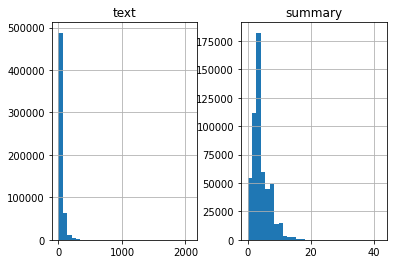

In [ ]:
text_word_count = []
summary_word_count = []


for i in clean_texts:
      text_word_count.append(len(i.split()))

for i in clean_summaries:
      summary_word_count.append(len(i.split()))

a = {'text':text_word_count, 'summary':summary_word_count}
length_df = pd.DataFrame.from_dict(a, orient='index')
length_df = length_df.transpose()

length_df.hist(bins = 30)
plt.show()